In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob
import os

In [5]:
asl_ds = tf.keras.preprocessing.image_dataset_from_directory('./asl_dataset')

Found 2515 files belonging to 36 classes.


In [6]:
class_names=asl_ds.class_names
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

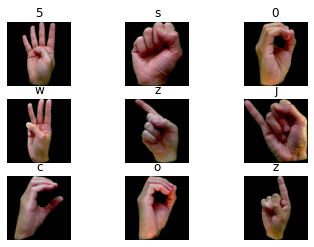

In [7]:
for images, labels in asl_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
minValue = 70
data=[]
def func(path):    
    frame = cv2.imread(path)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    resized = cv2.resize(res,(128,128), interpolation = cv2.INTER_AREA)
    data.append(resized)
    return resized

<class 'numpy.ndarray'>


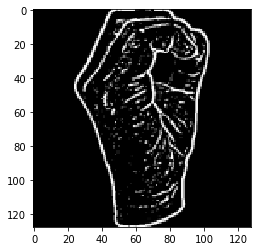

In [13]:
arr=func('./asl_dataset/0/hand5_0_dif_seg_2_cropped.jpeg')
print(type(arr))
plt.imshow(arr, interpolation='nearest',cmap='binary')
plt.show()

In [14]:
def img_preprocess(path):
    for class_name in class_names:
        files=glob.glob(path+'/'+class_name)
        listOfImg=os.listdir(files[0])
        for i in listOfImg:
            # print(files[0]+"/"+i)
            ele=func(files[0]+"/"+i)
            # data.append(ele)
            X.append(ele)
            y.append(class_name)

In [19]:
X=[]
y=[]
img_preprocess('./asl_dataset')

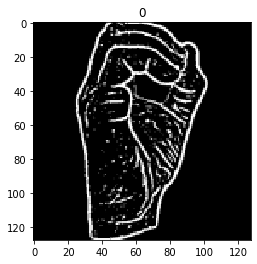

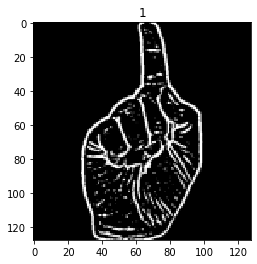

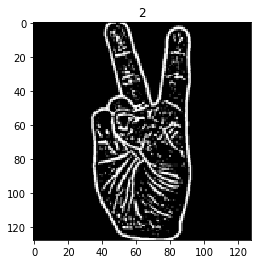

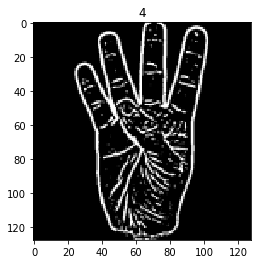

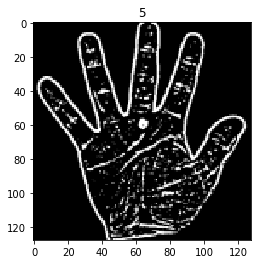

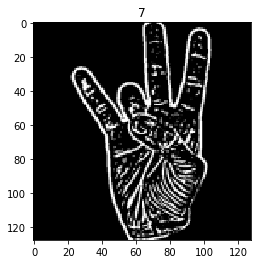

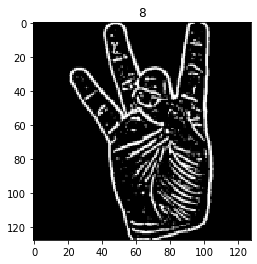

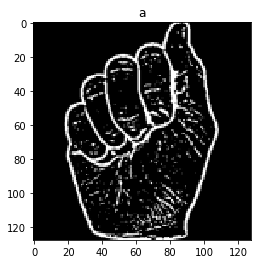

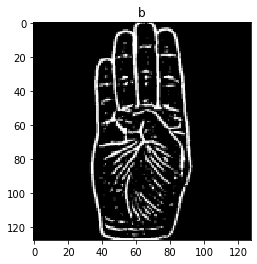

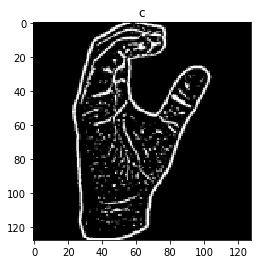

In [20]:
for i in range(0,1000,100):
    plt.imshow(X[i], interpolation='nearest',cmap='binary')
    plt.title(y[i])
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=np.array(X)
y=np.array(y)
X.shape

(2515, 128, 128)

In [23]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,MaxPooling2D
from keras.layers.convolutional import Conv2D

In [80]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [81]:
classifier.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy', 
                   metrics = ['accuracy'])

In [82]:

classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 32768)             0         
                                                                 
 dense_40 (Dense)            (None, 128)             

In [83]:
classifier.fit(X_train, y_train, epochs=15, verbose=2, validation_data=(X_test, y_test))

Epoch 1/15
63/63 - 25s - loss: 26.3643 - accuracy: 0.0313 - val_loss: 3.5704 - val_accuracy: 0.0278 - 25s/epoch - 397ms/step
Epoch 2/15
63/63 - 23s - loss: 3.4777 - accuracy: 0.0706 - val_loss: 3.3154 - val_accuracy: 0.1849 - 23s/epoch - 358ms/step
Epoch 3/15
63/63 - 23s - loss: 3.1242 - accuracy: 0.1620 - val_loss: 2.7336 - val_accuracy: 0.4115 - 23s/epoch - 359ms/step
Epoch 4/15
63/63 - 22s - loss: 2.5872 - accuracy: 0.2967 - val_loss: 1.7443 - val_accuracy: 0.6004 - 22s/epoch - 355ms/step
Epoch 5/15
63/63 - 22s - loss: 1.9986 - accuracy: 0.4493 - val_loss: 1.3001 - val_accuracy: 0.6958 - 22s/epoch - 356ms/step
Epoch 6/15
63/63 - 23s - loss: 1.7369 - accuracy: 0.5249 - val_loss: 0.8900 - val_accuracy: 0.7853 - 23s/epoch - 359ms/step
Epoch 7/15
63/63 - 22s - loss: 1.3763 - accuracy: 0.5934 - val_loss: 0.7927 - val_accuracy: 0.8211 - 22s/epoch - 354ms/step
Epoch 8/15
63/63 - 23s - loss: 1.1209 - accuracy: 0.6660 - val_loss: 0.6486 - val_accuracy: 0.8350 - 23s/epoch - 359ms/step
Epoch 9

In [46]:
model_json = classifier.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model_new.h5')
print('Weights saved')

Model Saved
Weights saved
